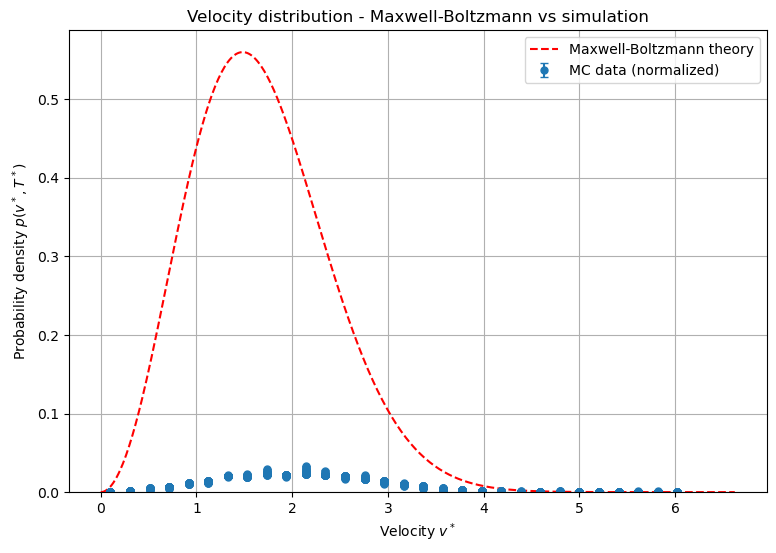

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# === Parametri simulazione ===
T = 1.1   # Temperatura ridotta (metti il valore che hai usato nel simulatore!)
m = 1.0   # massa ridotta
kB = 1.0  # costante di Boltzmann in unità ridotte

# === Distribuzione teorica Maxwell-Boltzmann in 3D ===
def maxwell_boltzmann(v, T):
    return (4*np.pi) * (v**2) * (1/(2*np.pi*T))**1.5 * np.exp(-v**2/(2*T))

# === Carica dati dal file ===
# pofv.dat: v_center  block_average  progressive_average  error
data = np.loadtxt("./OUTPUT/pofv.dat")

v = data[:,0]
prog_avg = data[:,2]   # media progressiva (non ancora normalizzata)
prog_err = data[:,3]   # errore progressivo (non ancora normalizzato)

# === Normalizzazione a posteriori ===
# Calcolo l'area sotto la curva e la uso per normalizzare
area = np.trapz(prog_avg, v)
prog_avg /= area
prog_err /= area

# === Maxwell-Boltzmann teorica ===
v_theory = np.linspace(0, v.max()*1.1, 400)
p_theory = maxwell_boltzmann(v_theory, T)

# === Plot ===
plt.figure(figsize=(9,6))
plt.errorbar(v, prog_avg, yerr=prog_err, fmt='o', capsize=3,
             label="MC data (normalized)", markersize=5)
plt.plot(v_theory, p_theory, 'r--', label="Maxwell-Boltzmann theory")
plt.ylim(bottom=0)
plt.xlabel("Velocity $v^*$")
plt.ylabel("Probability density $p(v^*,T^*)$")
plt.title("Velocity distribution - Maxwell-Boltzmann vs simulation")
plt.legend()
plt.grid(True)
plt.show()
